[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/modelling/regression/ANN.ipynb)

In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# **Using Pytorch Library**

## Data Processing

In [2]:
x = torch.randn(10, 5) # creating sample dataset with just 5 independent features - x1,x2,x3,x4,x5 and 2 rows
x

tensor([[ 0.5735,  0.3216, -0.4063, -0.8680, -0.9297],
        [-1.5721, -1.0972,  1.2874, -0.3608,  1.6875],
        [-1.3791,  1.4648,  0.0249, -0.2172,  1.8558],
        [ 1.2243, -0.5385,  0.4889, -1.4185,  0.9299],
        [-0.0999,  0.6914, -0.4404, -0.3492,  0.5248],
        [ 1.6019,  0.3271,  0.5663,  0.8342, -1.8867],
        [ 0.3440, -0.8186, -0.5206, -0.0775, -0.1463],
        [-0.0071, -0.2167,  1.0605, -0.5821, -1.5853],
        [-0.7526, -0.7772,  0.8142,  0.4499,  0.7371],
        [-0.8481, -1.0530, -0.2697, -0.9388, -0.6806]])

In [3]:
# Create the y data
y = torch.randn(10, 1)
y

tensor([[-1.1673],
        [ 0.4227],
        [ 0.9186],
        [-0.8102],
        [ 1.0306],
        [-0.6244],
        [ 1.3293],
        [-0.2073],
        [ 0.9589],
        [-0.2692]])

## Modelling

In [4]:
# creating a one hidden layer FFNN for regression
class SarveshANN(nn.Module):

  def __init__(self, input_size = 5, hidden_size = 10, output_size = 1): # 5 cause we have 5 features, 10 hidden units in hiddlen layer1 and just 1 output unit
    super(SarveshANN, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(input_size, hidden_size),nn.ReLU(),
        nn.Linear(hidden_size, output_size),nn.Identity() # nn.Sigmoid() and nn.LeakyReLU()
    )

  def forward(self, x):
    return self.model(x)

#Here is an alternative way to define the same class. You can see that we can replace nn.Sequential by defining the individual layers in the __init__ method and connecting the in the forward function.
#class MultilayerPerceptron(nn.Module):

#  def __init__(self, input_size = 5, hidden_size = 10, output_size = 1):
#    super(MultilayerPerceptron, self).__init__()
#    self.linear = nn.Linear(input_size, hidden_size)
#    self.relu = nn.ReLU()
#    self.linear2 = nn.Linear(hidden_size, output_size)
#    self.sigmoid = nn.Sigmoid()

#  def forward(self, x):
#    linear = self.linear(x)
#    relu = self.relu(linear)
#    linear2 = self.linear2(relu)
#    output = self.sigmoid(linear2)
#    return output

In [5]:
model = SarveshANN()
print(model)

SarveshANN(
  (model): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Identity()
  )
)


In [6]:
list(model.named_parameters()) #alternative to this is model.parameters() function -> these function gives the initial random parameters the model is taking

[('model.0.weight',
  Parameter containing:
  tensor([[-0.3315,  0.1719,  0.2954,  0.4191,  0.1928],
          [ 0.2622,  0.4154, -0.1604,  0.3762, -0.2619],
          [ 0.3142,  0.3027, -0.1464, -0.0748,  0.2092],
          [-0.1654, -0.2037,  0.0038, -0.2757, -0.0425],
          [-0.1058, -0.2375, -0.2174,  0.0518,  0.2674],
          [ 0.0740, -0.4104,  0.4351, -0.4386,  0.2769],
          [ 0.1942, -0.2375, -0.3726,  0.1471, -0.1775],
          [ 0.2108,  0.3415, -0.4429, -0.4171,  0.3387],
          [ 0.4443, -0.0314, -0.3438,  0.4007,  0.1270],
          [ 0.2616, -0.0256,  0.2086, -0.0108, -0.1076]], requires_grad=True)),
 ('model.0.bias',
  Parameter containing:
  tensor([ 0.3727,  0.4201, -0.4403, -0.0602,  0.2153,  0.0694, -0.3644, -0.2356,
          -0.1612, -0.0343], requires_grad=True)),
 ('model.2.weight',
  Parameter containing:
  tensor([[ 0.2308, -0.1047,  0.1901, -0.1783, -0.0847,  0.3087,  0.0953,  0.0040,
           -0.1520,  0.1609]], requires_grad=True)),
 ('model

## Training

In [7]:
# Define the optimizer
import torch.optim as optim
adam = optim.Adam(model.parameters(), lr=1e-1)

# Define loss using a predefined loss function
loss_function = nn.MSELoss()

In [8]:
# training for 10 epochs
for epoch in range(10):

  #Set the gradients to 0
  adam.zero_grad()

  #forward propagation
  y_pred = model(x)
  loss = loss_function(y_pred, y)
  print(f"Epoch {epoch}: traing loss: {loss}")

  #backward propagation to compute the gradients
  loss.backward()

  #Updating weights - Take a step to optimize the weights
  adam.step()


Epoch 0: traing loss: 0.7238559126853943
Epoch 1: traing loss: 0.4616270959377289
Epoch 2: traing loss: 0.3622797131538391
Epoch 3: traing loss: 0.291158527135849
Epoch 4: traing loss: 0.20883259177207947
Epoch 5: traing loss: 0.13521096110343933
Epoch 6: traing loss: 0.11236502975225449
Epoch 7: traing loss: 0.10875433683395386
Epoch 8: traing loss: 0.07642270624637604
Epoch 9: traing loss: 0.05120859667658806


In [9]:
list(model.parameters()) #parameters learnt after training

[Parameter containing:
 tensor([[-0.3463,  0.4893, -0.3852,  0.7432,  0.5503],
         [ 0.7996,  0.6575, -0.3329, -0.2822, -0.6179],
         [-0.1046,  0.7215, -0.5651,  0.3439, -0.2096],
         [ 0.0794,  0.1372,  0.1321, -1.1493,  0.1158],
         [ 0.3498, -0.6159, -0.1955,  0.1846,  0.4339],
         [-0.4775, -0.4421, -0.2278,  0.1228, -0.3686],
         [ 0.4701, -0.7845, -1.0019,  0.5510,  0.4515],
         [ 0.4456,  0.0307, -0.0338, -0.6453,  0.4981],
         [ 0.3424,  0.2369, -0.2101,  0.3727,  0.1966],
         [-0.2338,  0.4287, -0.0977,  0.4218,  0.4113]], requires_grad=True),
 Parameter containing:
 tensor([ 0.9612, -0.3708, -0.8591, -0.1143,  0.3620, -0.1867,  0.0374, -0.7680,
         -0.7459, -0.4705], requires_grad=True),
 Parameter containing:
 tensor([[ 0.5694, -0.4056, -0.2287, -0.8405,  0.1574, -0.2690,  0.7462, -0.0363,
           0.0089, -0.3246]], requires_grad=True),
 Parameter containing:
 tensor([0.2017], requires_grad=True)]

## Inference

In [10]:
# See how our model performs on the training data
y_pred = model(x)
y_pred

tensor([[-0.9890],
        [ 0.6367],
        [ 1.1661],
        [-0.9566],
        [ 0.7818],
        [-0.5555],
        [ 1.5368],
        [-0.3623],
        [ 1.0656],
        [-0.5250]], grad_fn=<AddmmBackward0>)

# **Without Using Pytorch Library**

## Data Preprocessing

In [38]:
# Generate 1D data
np.random.seed(42)
X = np.linspace(-3, 3, 300).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.normal(0, 1, X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

In [39]:
class SingleHiddenLayerNNRegression:

    def __init__(self, input_size, hidden_size, output_size=1, learning_rate=0.01):

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases with small random values
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.1
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.1
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def linear(self, z):
        return z

    def forward_pass(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.linear(self.z2)
        return self.a2

    def compute_loss(self, y_true, y_pred):
        """Compute Mean Squared Error (MSE) loss for regression"""
        m = y_true.shape[0]
        mse = np.sum((y_pred - y_true) ** 2) / (2 * m)  # MSE = (1/2m) * sum((y_pred - y_true)²)
        return mse

    def train(self, X, y, epochs=10000, verbose=True):
        losses = []

        for epoch in range(epochs):

            '''Make Prediction using Forward Pass'''
            y_pred = self.forward_pass(X)

            '''Compute Loss'''
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)

            '''Backward Pass '''
            dz2 = (y_pred - y) / X.shape[0] # Output layer gradients / number of training examples
            dW2 = np.dot(self.a1.T, dz2) # Output Layer Weights Gradient
            db2 = np.sum(dz2, axis=0, keepdims=True) # Output Layer Bias Gradient
            dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1) # Hidden layer gradients
            dW1 = np.dot(X.T, dz1) # Hidden Layer Weights Gradient
            db1 = np.sum(dz1, axis=0, keepdims=True) # Hidden Layer Bias Gradient

            '''Update Weights'''
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1
            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2

            # Print progress
            if verbose and epoch % 200 == 0:
                r2 = self.compute_r2(y, y_pred)
                print(f"Epoch {epoch}, MSE Loss: {loss:.6f}, R²: {r2:.4f}")

        return losses

    def predict(self, X):
        return self.forward_pass(X)

    def compute_r2(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

    def compute_metrics(self, y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        rmse = np.sqrt(mse)
        return {'MSE': mse,'RMSE': rmse,'MAE': mae,'R²': r2}

## Training

In [40]:
nn = SingleHiddenLayerNNRegression(input_size=1, hidden_size=10, output_size=1, learning_rate=0.1)
losses = nn.train(X_train, y_train, epochs=1500, verbose=False)

## Inference

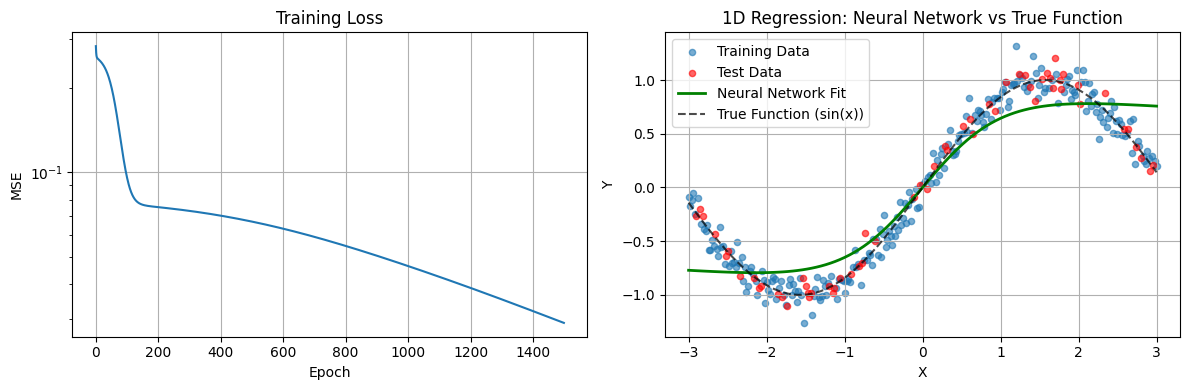

1D Regression Test Metrics:
  MSE: 0.0686
  RMSE: 0.2619
  MAE: 0.2178
  R²: 0.8865


In [41]:
# Predictions
y_pred = nn.predict(X_test)

# Create smooth curve for visualization
X_smooth = np.linspace(-3, 3, 100).reshape(-1, 1)
y_smooth = nn.predict(X_smooth)

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.yscale('log')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, alpha=0.6, label='Training Data', s=20)
plt.scatter(X_test, y_test, alpha=0.6, color='red', label='Test Data', s=20)
plt.plot(X_smooth, y_smooth, 'g-', linewidth=2, label='Neural Network Fit')
plt.plot(X_smooth, np.sin(X_smooth), 'k--', alpha=0.7, label='True Function (sin(x))')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('1D Regression: Neural Network vs True Function')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Compute test metrics
test_metrics = nn.compute_metrics(y_test, y_pred)
print("1D Regression Test Metrics:")
for metric, value in test_metrics.items():
    print(f"  {metric}: {value:.4f}")